In [3]:
import dgl
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler
import dgl.data
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
import numpy as np
import dgl.data
from karateclub import Graph2Vec, FeatherGraph, GL2Vec
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import networkx as nx

graphs = dgl.load_graphs('./fraud_homographs.dgl')

dataset = tuple(zip(graphs[0], graphs[1]['glabels'].argmax(1)))


labels = [l for _, l in dataset]

graphss = [nx.Graph(dgl.to_networkx(g)) for g, _ in dataset]



Using backend: pytorch


In [40]:
print(graphss[0])

Graph with 426 nodes and 930 edges


In [45]:
# Model selection (Feather-G, GL2Vec, Graph2Vec)

model = FeatherGraph() #Feather-G for Graph Embedding
# model = GL2Vec() #GL2Vec for Graph Embedding
# model = Graph2Vec() #Graph2Vec for Graph Embedding

model.fit(graphss)

In [46]:

X = model.get_embedding()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

clf = make_pipeline(StandardScaler(), RandomForestClassifier())
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# print(y_hat)
# print(y_test)

# from sklearn.metrics import roc_auc_score
auc = accuracy_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

f1 = f1_score(y_test, y_hat, average='weighted')
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
print('F1: {:.4f}, Pre: {:.4f}, Re: {:.4f}'.format(f1, precision, recall))

AUC: 0.7238
F1: 0.7239, Pre: 0.7272, Re: 0.7238


In [52]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

data = X_test

n_components = 2

model = TSNE(n_components=n_components)

dot = model.fit_transform(data.data)

C:\ProgramData\Anaconda3\envs\ICC2022\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ICC2022\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
dot[:,0]

array([ 39.507217 , -14.2413845, -21.746464 , ...,   7.23012  ,
        21.196566 ,   2.2612996], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


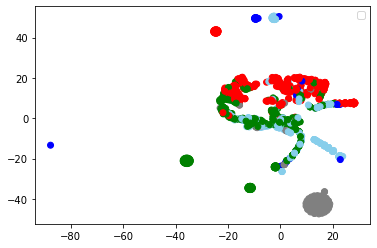

In [53]:
df = pd.DataFrame(dict(X=dot[:,0], Y=dot[:,1], y_hat=y_hat))

fig, ax = plt.subplots()

colors = {0:'red', 1:'green', 2:'blue', 3:'skyblue', 4:'gray'}

# ax.scatter(df['X'], df['Y'])

ax.scatter(df['X'], df['Y'], c=df['y_hat'].map(colors))

plt.legend()

plt.show()